Importing base packages

In [71]:
#standard packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#EPA workbench
from ema_workbench import (Model, Policy, ema_logging,
                           MultiprocessingEvaluator, save_results)

from problem_formulation import get_model_for_problem_formulation


In [72]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

Creates functions the four main scenarios.
-Nothing happens
-Only dike height increases
-Only room for river
-The policy that came through the debate


In [73]:
#defines a function where no levers are applied
def base_case():
    return {l.name:0 for l in dike_model.levers}


policies = [Policy("base case", **base_case()),
            Policy("only heighting", **dict(base_case(),
                                            **{'A.1_DikeIncrease 0':10,
                                              'A.2_DikeIncrease 0':10,
                                              'A.3_DikeIncrease 0':10,
                                              'A.4_DikeIncrease 0':10,
                                              'A.5_DikeIncrease 0':10,})),
            Policy("only RfR", **dict(base_case(),
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1,
                                         '4_RfR 0':1,
                                         })),
             Policy("Final policy debate", **dict(base_case(),
                                      **{

                                          #dike 1
                                          '0_RfR 0':1,
                                          'A.1_DikeIncrease 0':3,

                                         #dike 2
                                        'A.2_DikeIncrease 0':3,

                                          #dike 3
                                          'A.3_DikeIncrease 0':10,

                                          #dike 4
                                          '0_RfR 0':1,
                                          'A.4_DikeIncrease 0':3,

                                          #dike 5
                                          'A.5_DikeIncrease 0':10 }))]

In [74]:
n_scenarios = 500
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)


[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [03:39<00:00,  9.11it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [75]:
save_results(results, 'results_open_exporationtest.csv')

[MainProcess/INFO] results saved successfully to C:\Users\lukas\OneDrive\Documents\GitHub\epa1361_open\final assignment\results_open_exporationtest.csv


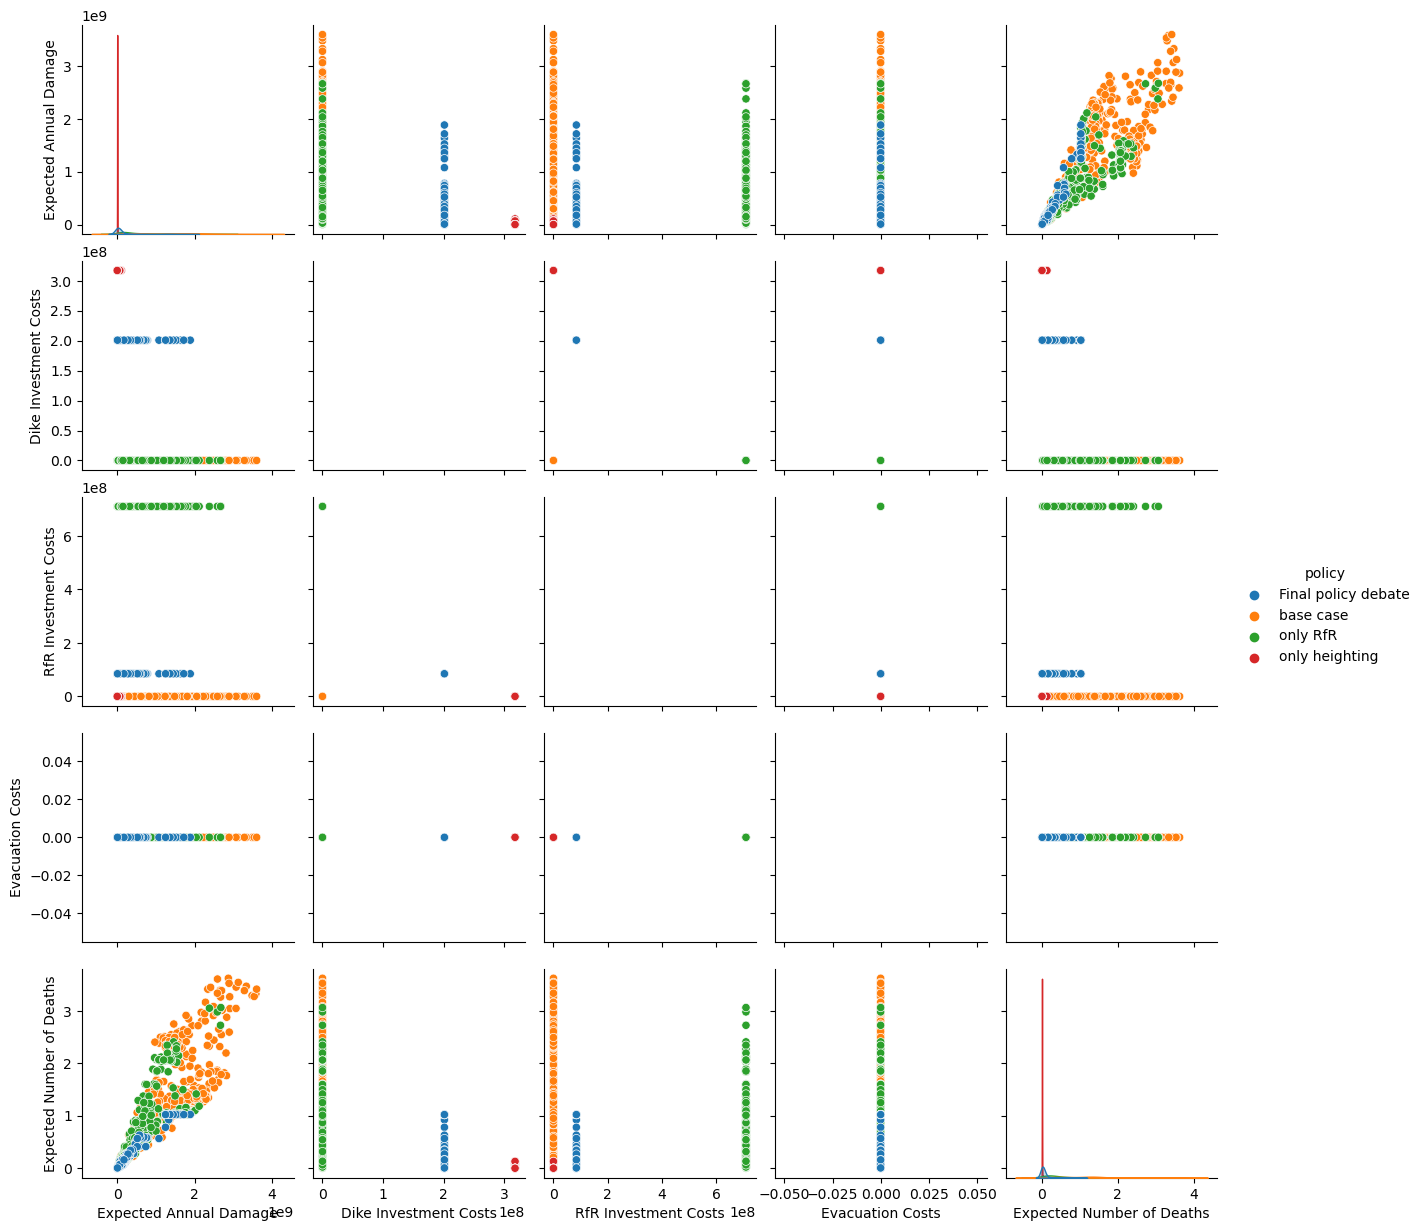

In [76]:
experiments, outcomes = results
#policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = experiments['policy']

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
plot.savefig("exploretest.png")
plt.show()

In [77]:
policies

[Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}),
 Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 10, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 10, 'A.2_DikeIncrease 1': 0, 'A.2_DikeInc

While the additional data per dike helps us to establish the situation for each individual

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [03:34<00:00,  9.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


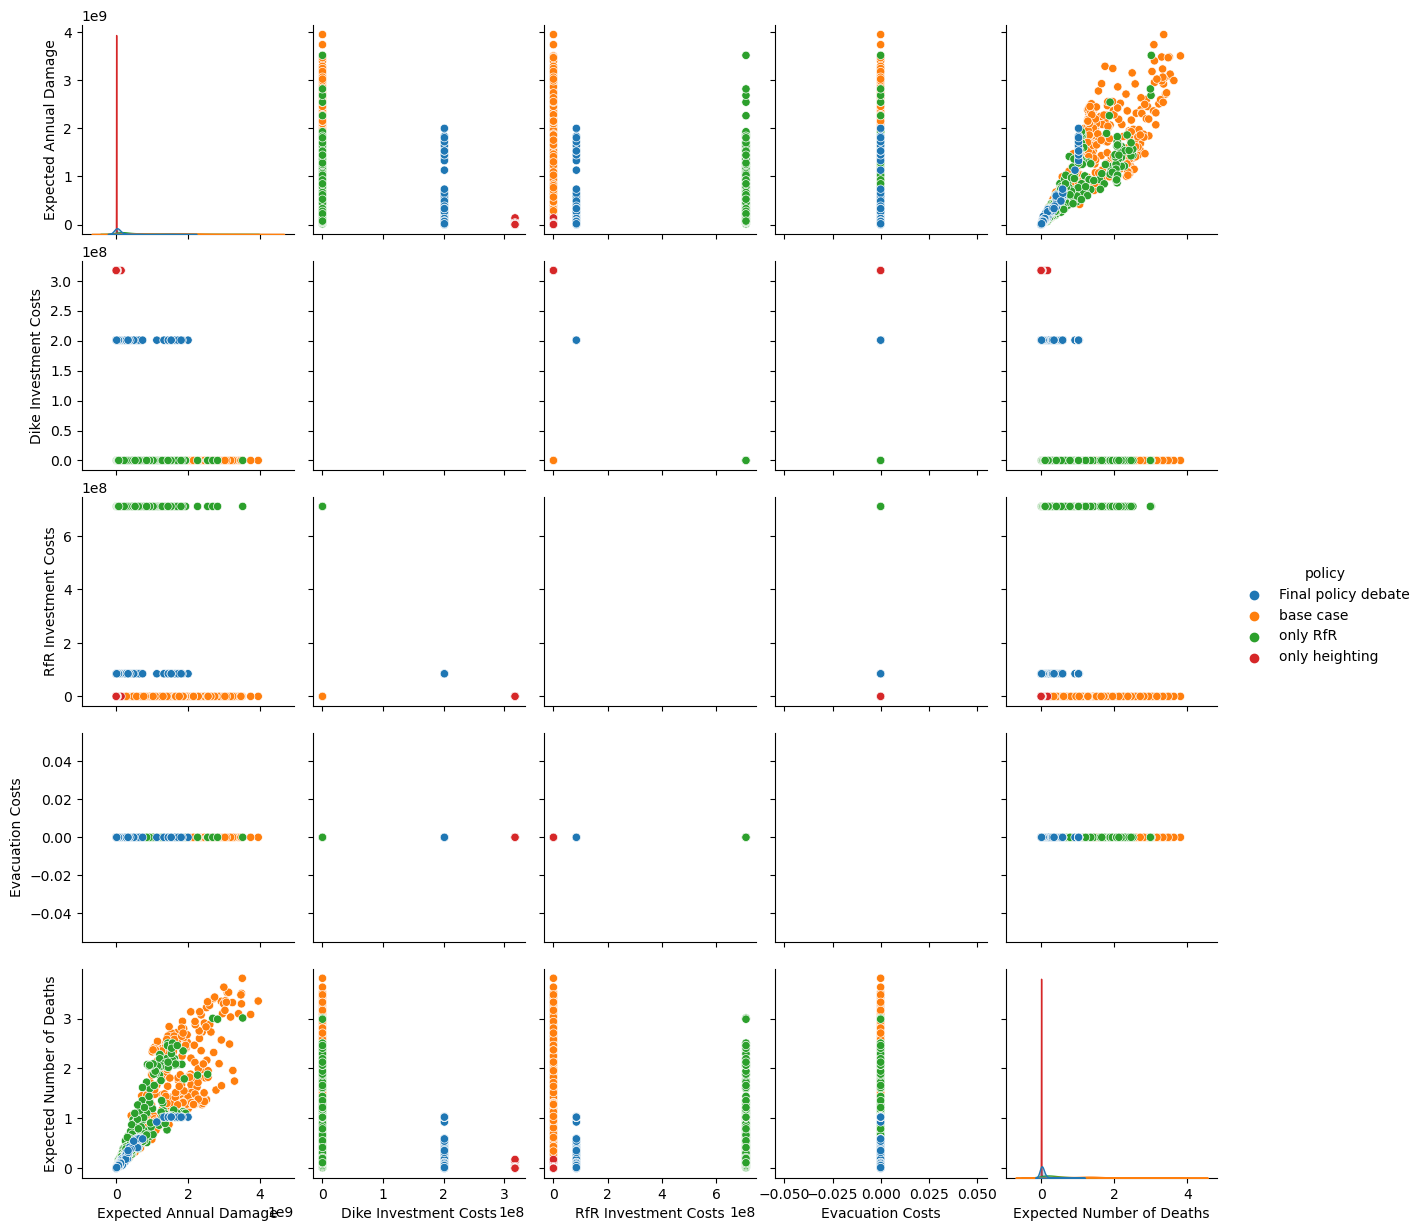

In [80]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# Load in self-created visualization functions
from visualization_functions import (histogram_maker, mean_outcomes, aggregate_outcomes,
                                     scatter_maker, pairplot_maker, boxplot_histogram_maker, boxplot_maker)

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
#results = results.drop(columns="model")
results.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,10,307.767301,10.0,0.624029,33.943382,1.5,0.383883,342.185644,1.5,0.123363,...,0,0,3000,base case,dikesnet,1.217671e+09,0,0.0,0.0,2.511251
1,99,39.516394,1.5,0.418645,324.057810,10.0,0.550647,193.856050,10.0,0.299492,...,0,0,3001,base case,dikesnet,2.694977e+09,0,0.0,0.0,2.550329
2,88,161.882124,1.0,0.122653,317.455462,10.0,0.282513,98.533505,1.0,0.727518,...,0,0,3002,base case,dikesnet,1.632461e+09,0,0.0,0.0,1.283529
3,16,113.280071,1.5,0.333978,329.692797,10.0,0.865199,69.201905,1.0,0.429079,...,0,0,3003,base case,dikesnet,2.170125e+09,0,0.0,0.0,1.434452
4,72,198.848275,10.0,0.569093,331.683536,1.0,0.547631,46.549076,1.0,0.889924,...,0,0,3004,base case,dikesnet,1.987960e+08,0,0.0,0.0,0.168143


In [81]:
# Create an aggregate score of the outcomes over location and time, some visualizations only work on the total score.
aggregate_outcomes(results, "Expected Annual Damage")
aggregate_outcomes(results, "Expected Number of Deaths")

In [87]:
def front(self, n):
    return self.iloc[:, :n]

def back(self, n):
    return self.iloc[:, -n:]

pd.DataFrame.front = front
pd.DataFrame.back = back

results.front(40)

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1
0,10,307.767301,10.0,0.624029,33.943382,1.5,0.383883,342.185644,1.5,0.123363,...,0,0,0,0,0,0,0,0,0,0
1,99,39.516394,1.5,0.418645,324.057810,10.0,0.550647,193.856050,10.0,0.299492,...,0,0,0,0,0,0,0,0,0,0
2,88,161.882124,1.0,0.122653,317.455462,10.0,0.282513,98.533505,1.0,0.727518,...,0,0,0,0,0,0,0,0,0,0
3,16,113.280071,1.5,0.333978,329.692797,10.0,0.865199,69.201905,1.0,0.429079,...,0,0,0,0,0,0,0,0,0,0
4,72,198.848275,10.0,0.569093,331.683536,1.0,0.547631,46.549076,1.0,0.889924,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,85,303.965019,1.5,0.410068,325.146128,1.5,0.876774,159.683897,1.0,0.552389,...,0,0,0,0,0,3,0,0,3,0
1996,120,201.323411,10.0,0.677618,260.468260,1.5,0.539667,146.448943,1.5,0.875594,...,0,0,0,0,0,3,0,0,3,0
1997,10,321.198947,1.0,0.542696,262.966241,1.0,0.127934,189.051576,1.5,0.712434,...,0,0,0,0,0,3,0,0,3,0
1998,101,324.998900,1.0,0.255458,193.066343,1.0,0.073341,304.863275,1.0,0.598056,...,0,0,0,0,0,3,0,0,3,0


Plot Expected Number of Deaths(Histogram)
This is timestep 0


KeyError: 'A.1_Expected Number of Deaths 0'

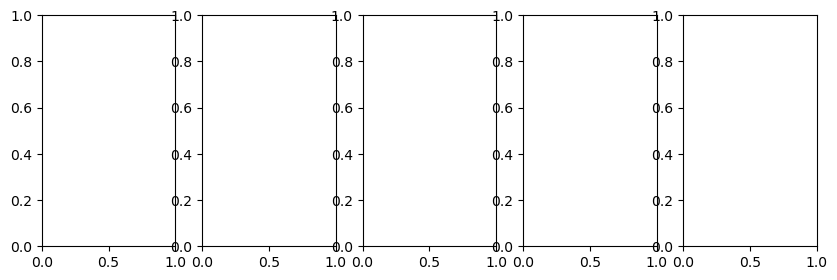

In [ ]:
outcome_names = ["Expected Annual Damage", "Expected Number of Deaths"]

mean_outcomes(results, outcome_names)

In [ ]:
# Takes more time to load than other visualizations
interact(pairplot_maker, results=fixed(results),
         n=[1, 2, 3], location=["A.1", "A.2", "A.3", "A.4", "A.5"])

Total Expected Number of Deaths First quartile (0.25): 0.0
Total Expected Number of Deaths Last quartile (0.75): 0.6416503807940563
Total Expected Number of Deaths Mean: 0.4849957460332973
Total Expected Annual Damage First quartile (0.25): 0.0
Total Expected Annual Damage Last quartile (0.75): 650867002.5222323
Total Expected Annual Damage Mean: 480064122.3422483


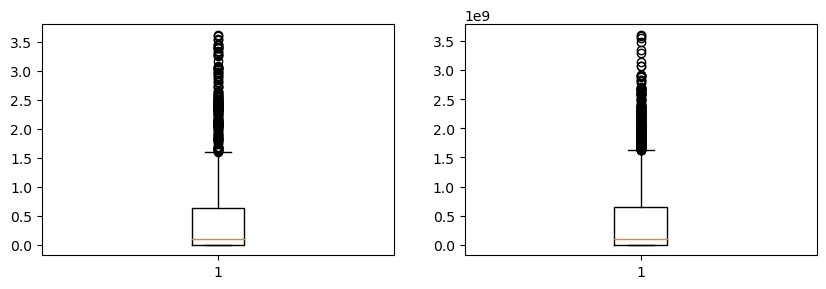

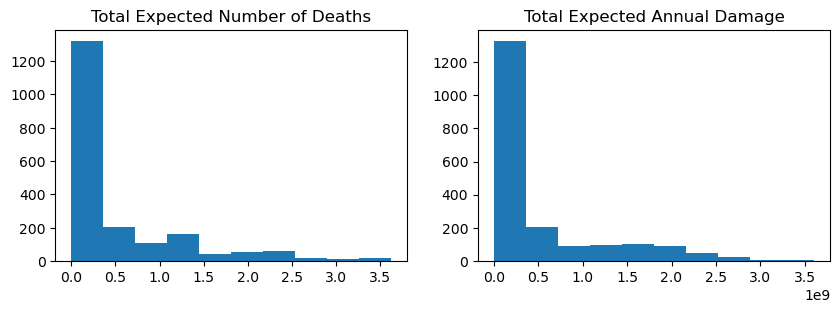

In [88]:
boxplot_histogram_maker(results)


In [92]:
x = experiments  # Only take the uncertainties

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths > np.percentile(y_deaths, 85)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 300 cases of interest
[MainProcess/INFO] mean: 0.9915254237288136, mass: 0.059, coverage: 0.39, density: 0.9915254237288136 restricted_dimensions: 4


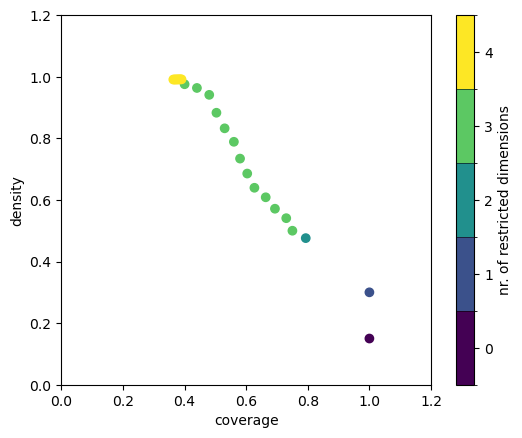

In [93]:
# Specific ema_workbench functions
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage     0.390000
density      0.991525
id          24.000000
mass         0.059000
mean         0.991525
res_dim      4.000000
Name: 24, dtype: float64

                      box 24                                  
                         min       max  qp value      qp value
A.3_pfail           0.001164  0.246300       NaN  2.510225e-36
A.3_DikeIncrease 0  0.000000  0.000000       NaN  1.334019e-34
0_RfR 0             0.000000  0.000000       NaN  3.819997e-14
A.2_pfail           0.044782  0.999265  0.214378           NaN



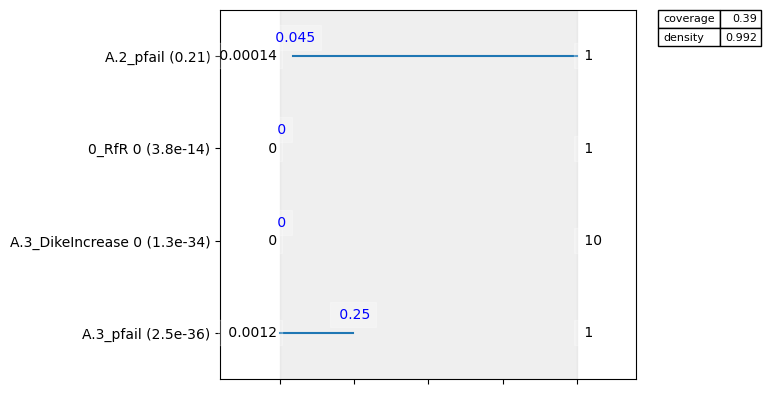

In [94]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

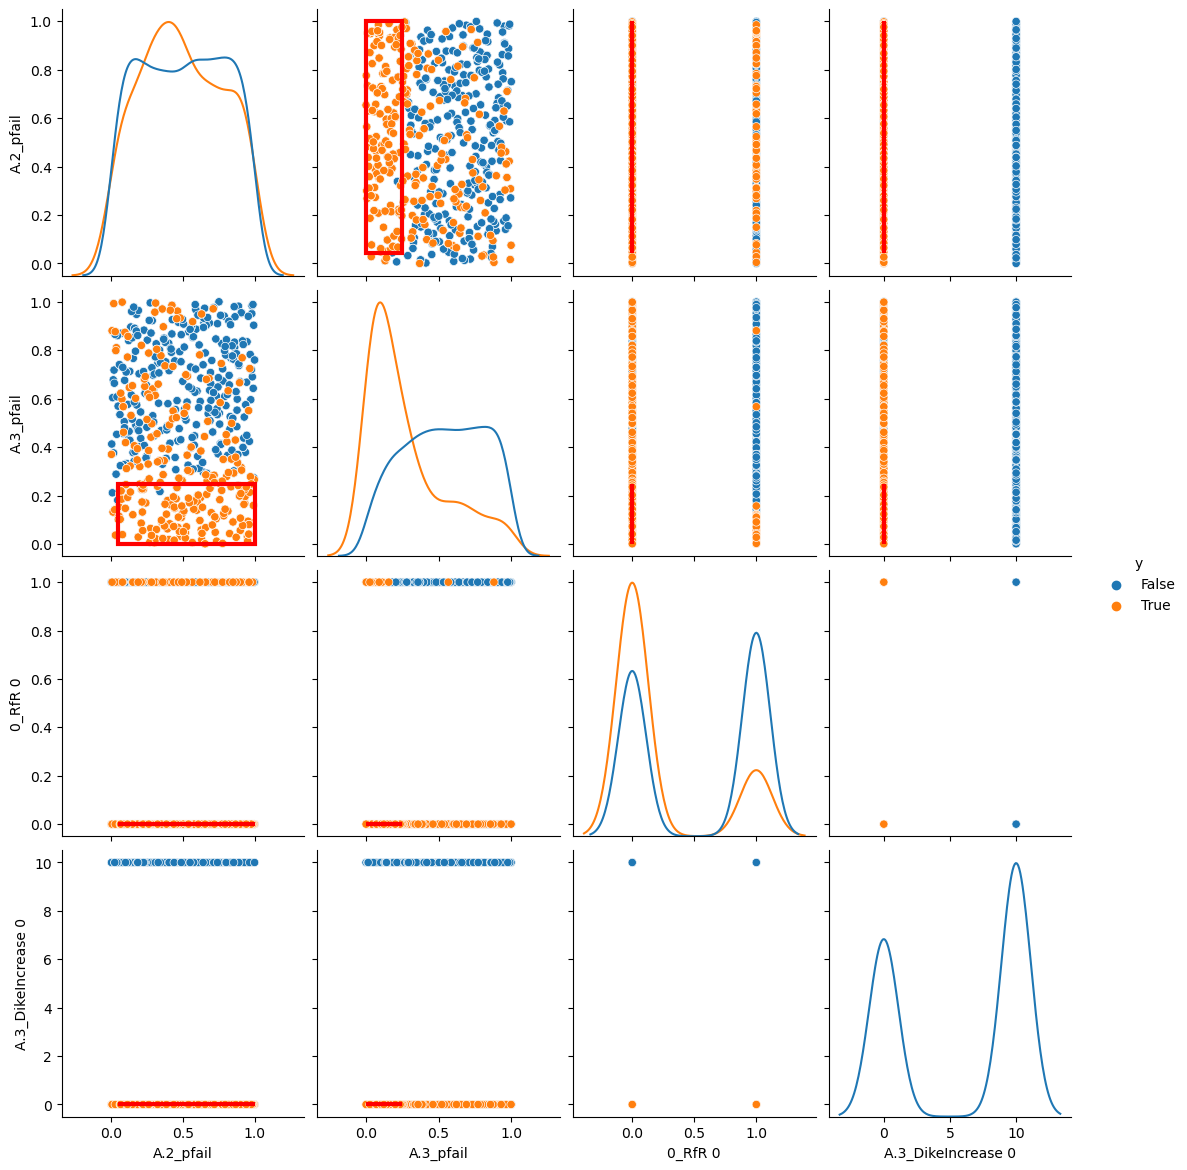

In [95]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

FileNotFoundError: [WinError 2] "dot" not found in path.

In [107]:
#THEN SAME FOR DAMAGES
y_damgs = results['Total Expected Annual Damage'].values
y_damgs = y_damgs > np.percentile(y_damgs, 75)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 500 cases of interest
[MainProcess/INFO] mean: 0.9421487603305785, mass: 0.0605, coverage: 0.228, density: 0.9421487603305785 restricted_dimensions: 9


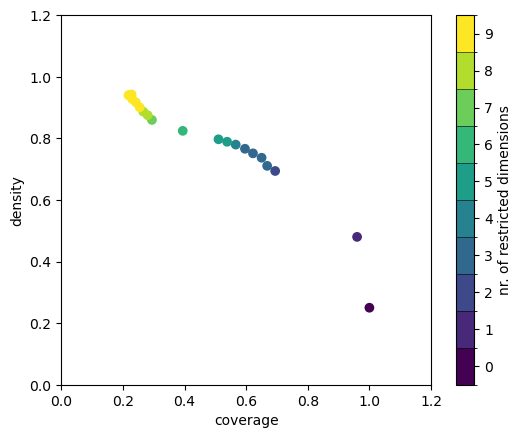

In [120]:
prim_alg = prim.Prim(x, y_damgs, threshold=0.65, peel_alpha=0.06)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage     0.228000
density      0.942149
id          22.000000
mass         0.060500
mean         0.942149
res_dim      9.000000
Name: 22, dtype: float64

                                  box 22                             \
                                     min              max  qp value   
A.3_DikeIncrease 0                   0.0              0.0       NaN   
0_RfR 0                              0.0              0.0       NaN   
A.3_pfail                       0.001164          0.73393       NaN   
A.0_ID flood wave shape              0.0            113.0       NaN   
A.1_pfail                       0.001354          0.84533       NaN   
A.5_pfail                       0.001761         0.890351       NaN   
discount rate 1          {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.012088   
discount rate 2          {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.015196   
A.4_Bmax                       52.849765       349.457879  0.214824   

                                       
                    

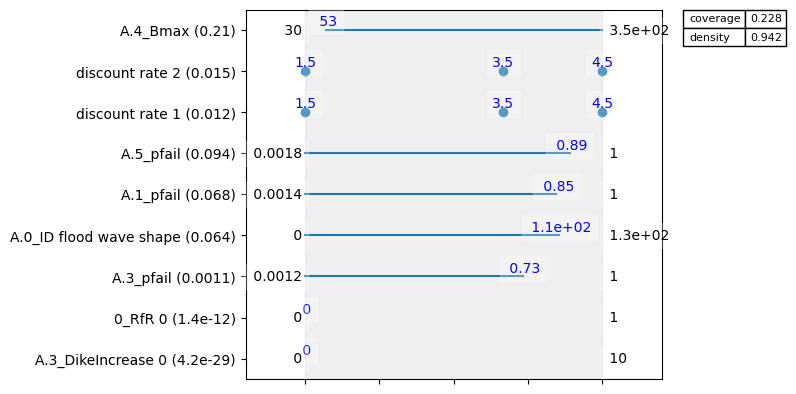

In [121]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

C:\Users\lukas\anaconda3\envs\geo_env\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


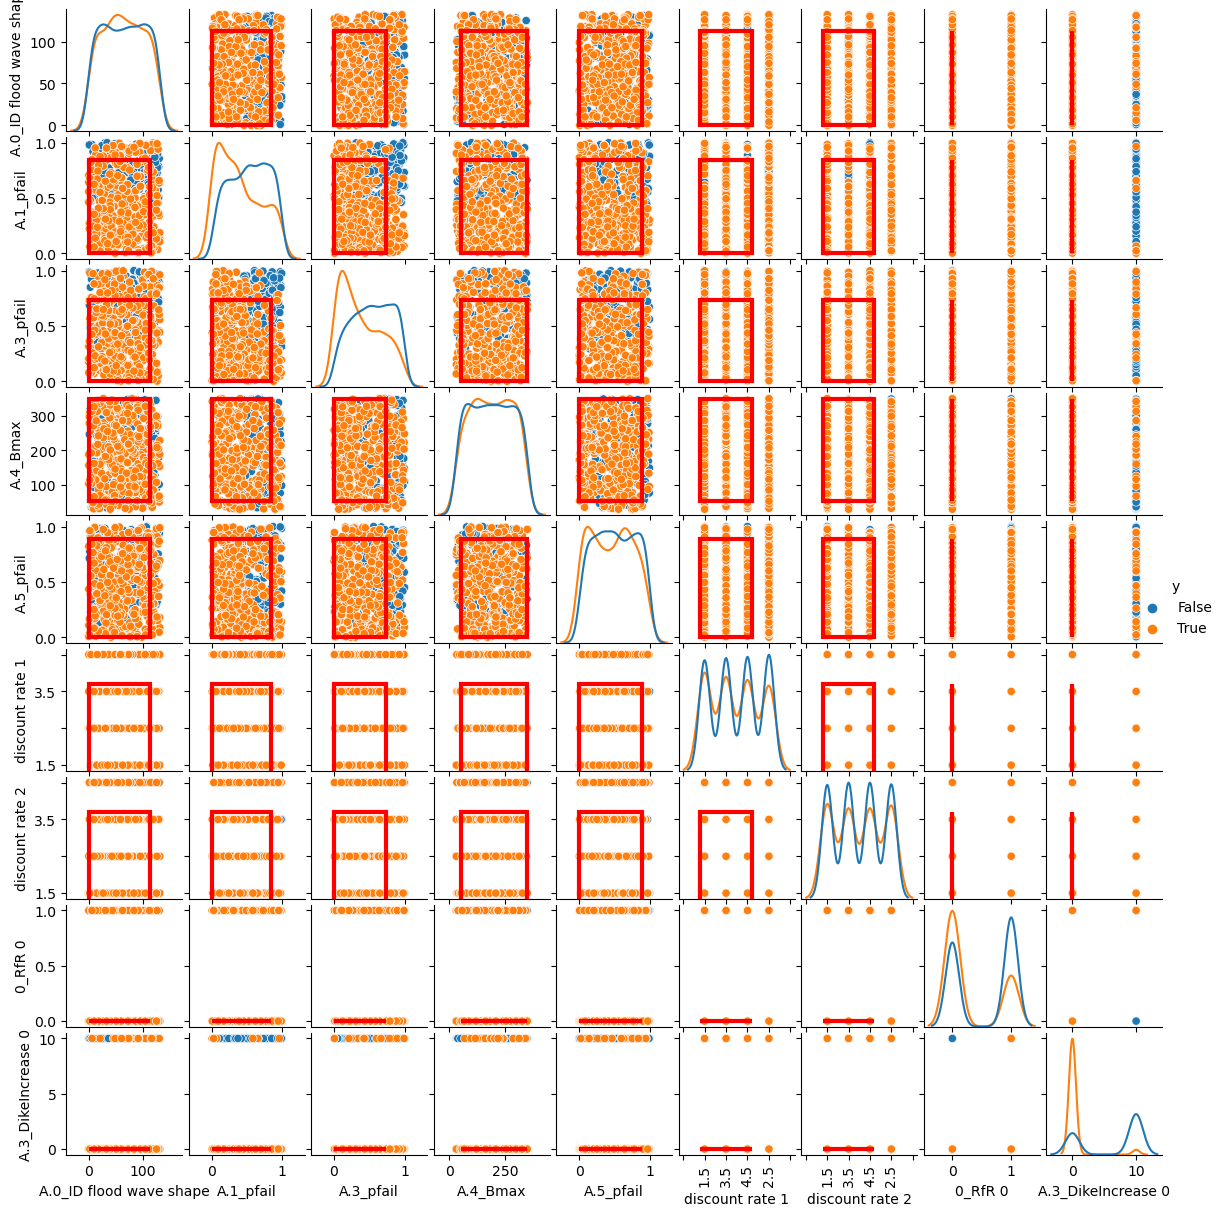

In [122]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()